In [ ]:
pip install torch transformers seaborn matplotlib numpy


In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

# Load Pretrained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

# Set model to evaluation mode
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_attention_scores(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, add_special_tokens=True)

    # Pass through BERT model
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract attention weights from the last layer
    attention = outputs.attentions[-1]  # Shape: (batch_size, num_heads, seq_len, seq_len)

    return inputs, attention


In [ ]:
def plot_attention_heatmap(inputs, attention, layer=-1, head=0):
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

    # Extract attention scores for the selected head and layer
    attn_matrix = attention[0, head].cpu().numpy()  # Shape: (seq_len, seq_len)

    # Adjust token list to match attention dimensions
    num_tokens = attn_matrix.shape[0]
    tokens = tokens[:num_tokens]  # Trim tokens if necessary

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=False)
    plt.title(f"Attention Heatmap (Layer {layer}, Head {head})")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

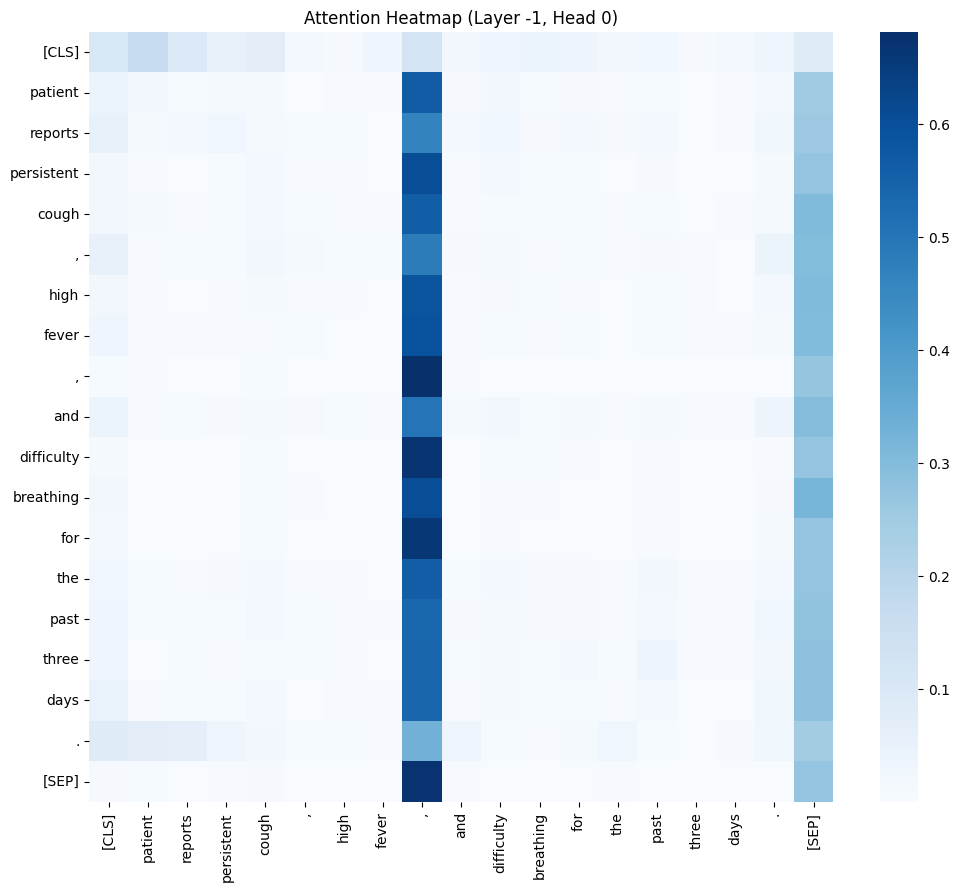

In [ ]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
inputs1, attention1 = get_attention_scores(text1)
plot_attention_heatmap(inputs1, attention1)


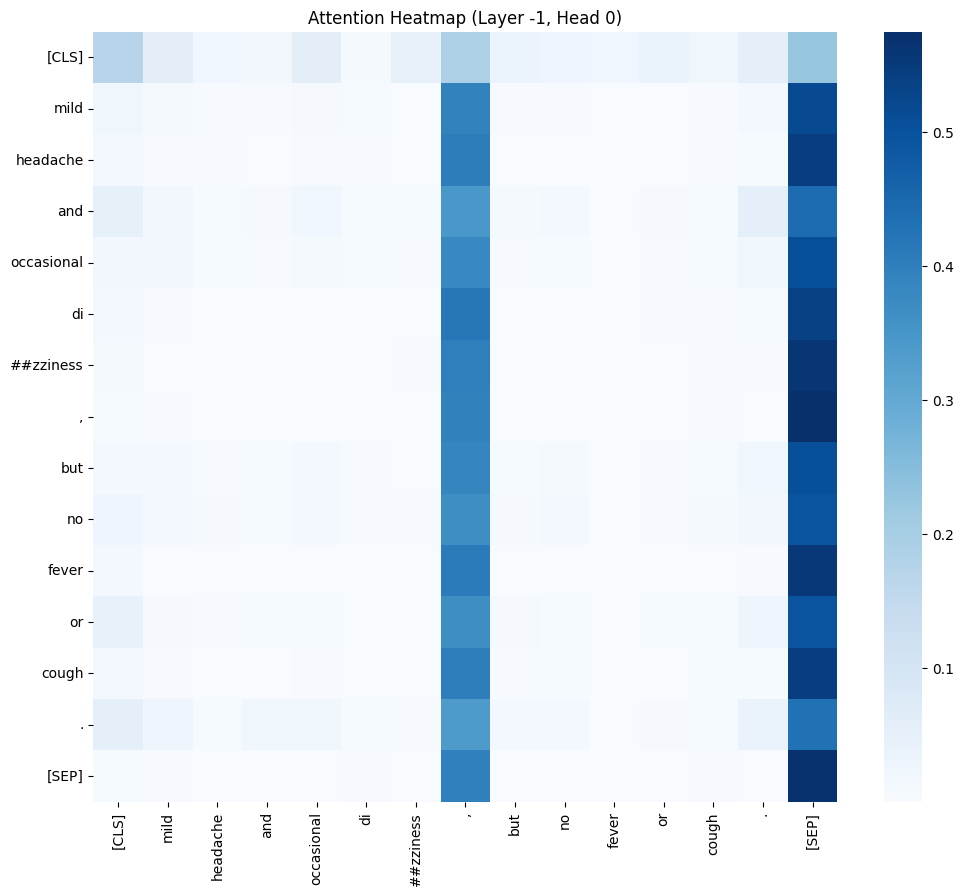

In [ ]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
inputs2, attention2 = get_attention_scores(text2)
plot_attention_heatmap(inputs2, attention2)


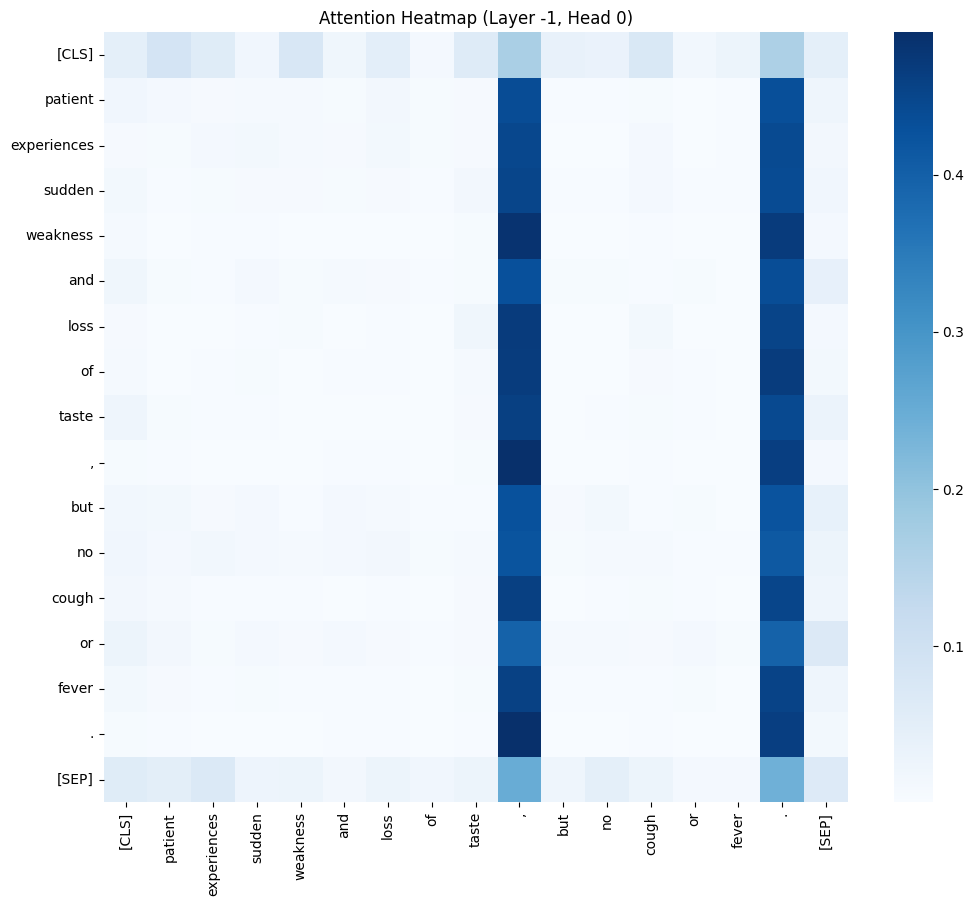

In [ ]:
text3 = "Patient experiences sudden weakness and loss of taste, but no cough or fever."
inputs3, attention3 = get_attention_scores(text3)
plot_attention_heatmap(inputs3, attention3)
